In [2]:
import io
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pickle

import numpy as np
from scipy import stats 
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_1samp

In [3]:
para_list = glob.glob('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/log/2023-05-01_09-36/para/2023-05-02_07-42/model/evaluation/2023-05-02_12-05/Move/*/*.txt')
not_para_list = glob.glob('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/log/2023-05-01_09-36/no_para/2023-05-02_06-22/model/evaluation/2023-05-02_12-05/Move/*/*.txt')

In [4]:
# just compre

In [5]:
def info_iou(path_list):
    iou_list = []
    for path in path_list:
        with open(path, 'r') as f:
            iou = f.read()
        iou_list.append(float(iou))
    print('mean', np.mean(iou_list), 'std', np.std(iou_list))
    return iou_list

In [6]:
para_iou_list = info_iou(para_list)
not_para_iou_list = info_iou(not_para_list)

mean 0.36281314713831114 std 0.14610161349180686
mean 0.3781253876734395 std 0.13421327695955235


In [7]:
stats.ttest_ind(para_iou_list, not_para_iou_list)

Ttest_indResult(statistic=-0.5402756423108601, pvalue=0.5902326833566476)

In [8]:
# compare average and success rate

In [41]:
train_files = glob.glob('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/pbm/experts/Rope_10_500/*/expert*.pickle')
para_list = glob.glob('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/log/Rope/2023-05-04_17-54/para/2023-05-04_18-25/model/evaluation/2023-05-05_02-48/Rope/*/*.txt')
not_para_list = glob.glob('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/log/Rope/2023-05-04_17-54/no_para/2023-05-04_18-24/model/evaluation/2023-05-05_02-48/Rope/*/*.txt')

In [42]:
def info_iou(path_list):
    length_list = []
    mu_list = []
    lam_list = []
    yield_stress_list = []
    success_flag = []
    for path in path_list:
        with open(path, 'r') as f:
            data = f.read()
        data_split = data.split(',')
        if data_split[0] != '0':
            success_flag.append(1)
        else:
            success_flag.append(0)
        length_list.append(float(data_split[0]))
        mu_list.append(float(data_split[1]))
        lam_list.append(float(data_split[2]))
        yield_stress_list.append(float(data_split[3]))
    print('---------------------------')
    print('all')
    print('success', sum(success_flag), '/', len(path_list))
    print('length', 'mean', np.mean(length_list), 'std', np.std(length_list))
    print('mu', 'mean', np.mean(mu_list), 'std', np.std(mu_list))
    print('lam', 'mean', np.mean(lam_list), 'std', np.std(lam_list))
    print('yield_stress', 'mean', np.mean(yield_stress_list), 'std', np.std(yield_stress_list))
    return length_list, mu_list, lam_list, yield_stress_list, success_flag

In [43]:
para_length_list, para_mu_list, para_lam_list, para_yield_stress_list, para_success_flag = info_iou(para_list)
length_list, mu_list, lam_list, yield_stress_list, success_flag = info_iou(not_para_list)

---------------------------
all
success 301 / 500
length mean 0.15571741902497957 std 0.13087683940803005
mu mean 247.92337746518754 std 144.49604965098743
lam mean 253.76919486935313 std 140.68612810930486
yield_stress mean 256.82556592513316 std 144.13651027012386
---------------------------
all
success 274 / 500
length mean 0.14310397032657712 std 0.13237613222578862
mu mean 247.92337746518754 std 144.49604965098743
lam mean 253.76919486935313 std 140.68612810930486
yield_stress mean 256.82556592513316 std 144.13651027012386


same success count 226
same para length mean 0.27191054877465454 std 0.04053290552714648
same not para length mean 0.26778601033931515 std 0.03293451153341563
same success count 27
same para length mean 0.2187590065255714 std 0.015697426639299468
same not para length mean 0.0 std 0.0
same success count -27
same para length mean 0.0 std 0.0
same not para length mean 0.22984055888756996 std 0.01705502860226096
same success count 575
same para length mean 0.0 std 0.0
same not para length mean 0.0 std 0.0


Text(0.5, 1.0, 'train')

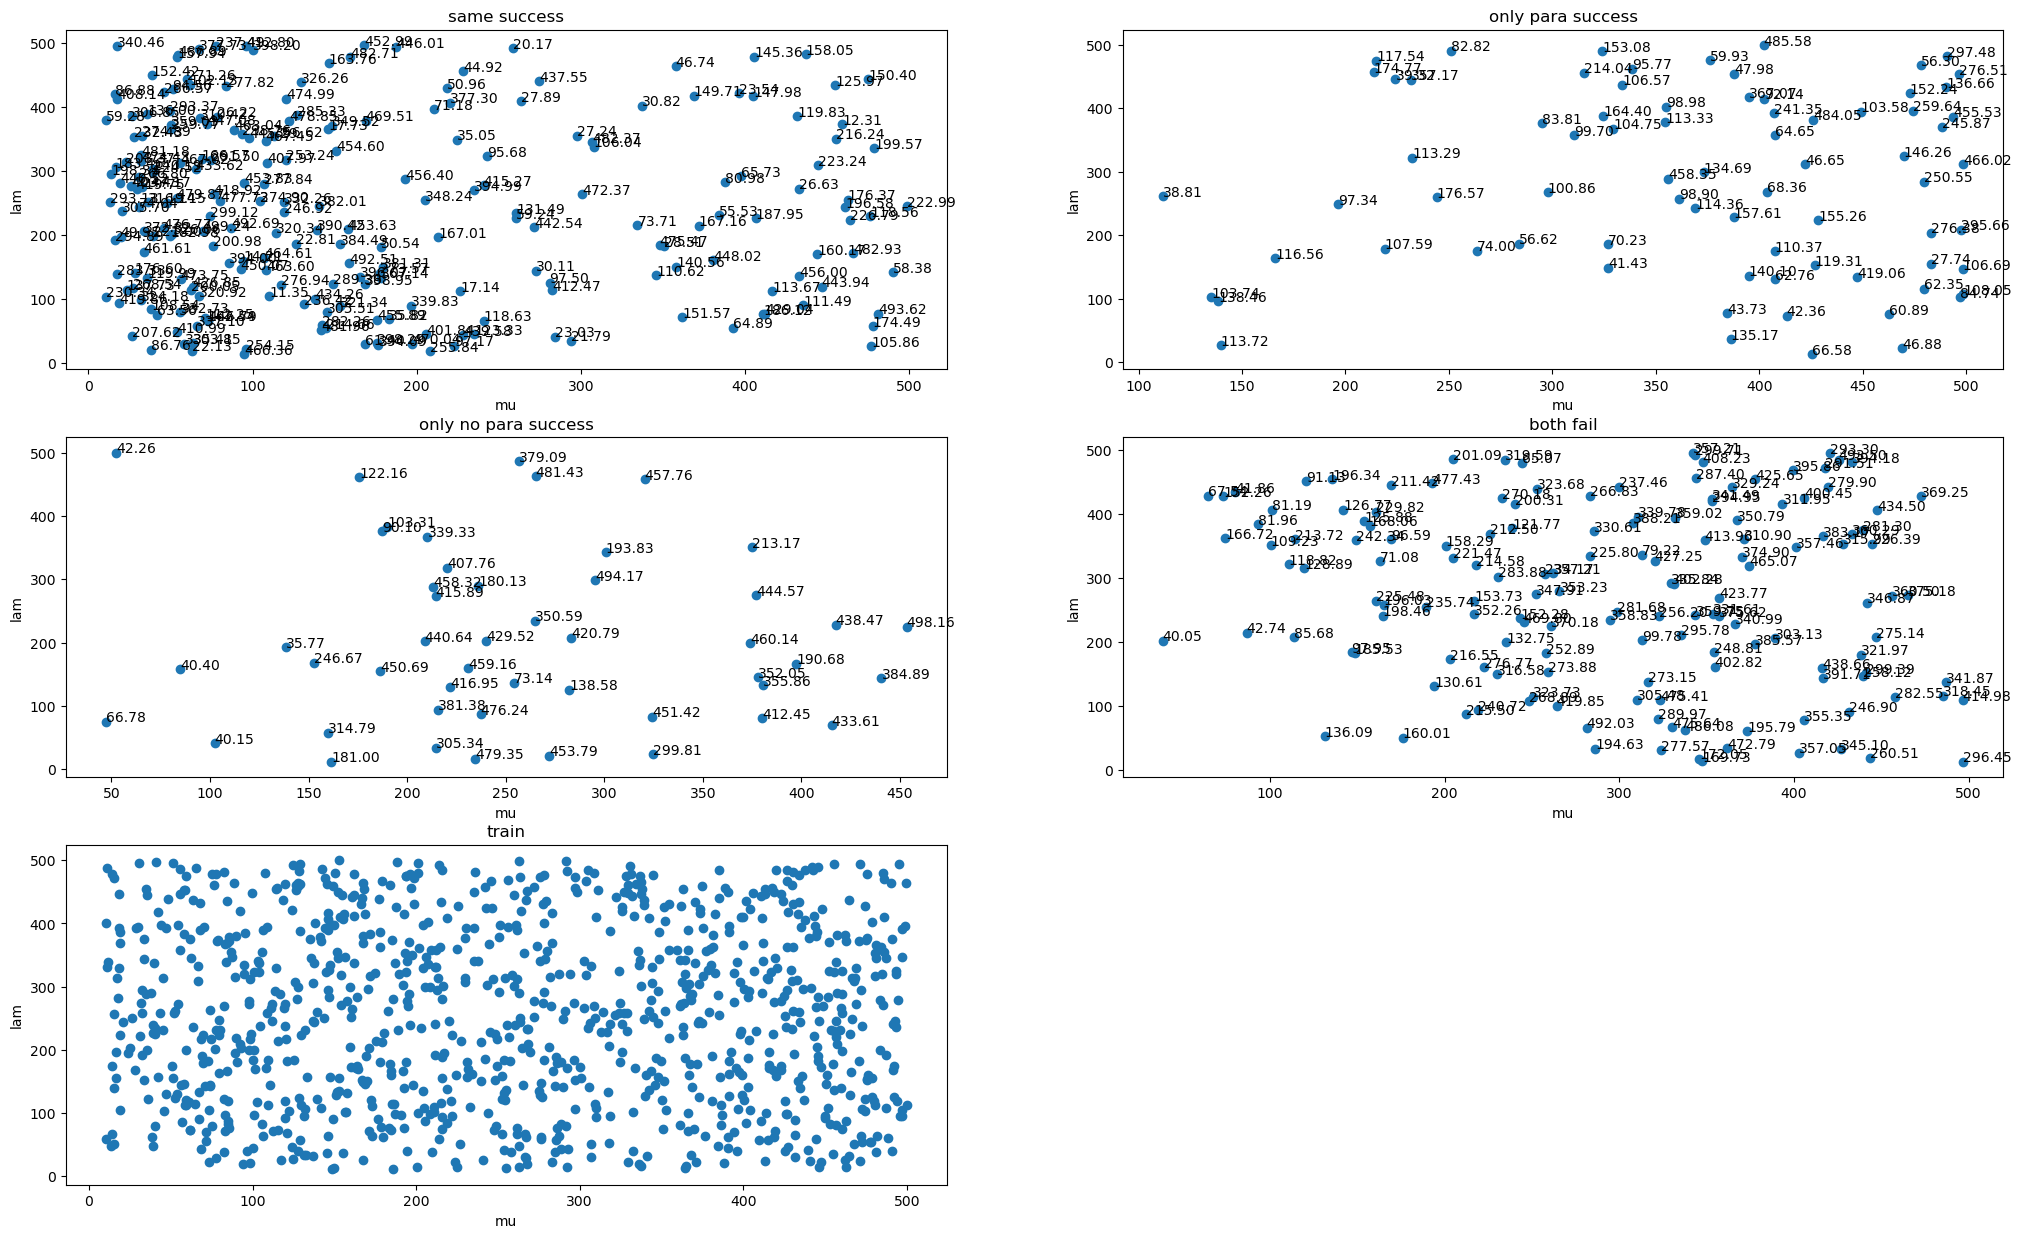

In [44]:
fig = plt.figure(figsize=(25, 15))


# test

# same success
same_success = (np.array(para_success_flag) * np.array(success_flag)).tolist()

same_para_length_list = []
same_no_para_length_list = []
same_mu_list = []
same_lam_list = []
same_yield_stress_list = []
for idx, value in enumerate(same_success):
    if value == 1:
        same_para_length_list.append(para_length_list[idx])
        same_no_para_length_list.append(length_list[idx])

        same_mu_list.append(mu_list[idx])
        same_lam_list.append(lam_list[idx])
        same_yield_stress_list.append(yield_stress_list[idx])

print('same success count', sum(same_success))
print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

ax1 = fig.add_subplot(3, 2, 1)
ax1.scatter(same_mu_list, same_lam_list)
ax1.set_ylabel('lam')
ax1.set_xlabel('mu')

for i, txt in enumerate(same_yield_stress_list):
    ax1.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
ax1.set_title('same success')


# only para success
same_success = (np.array(para_success_flag) - np.array(success_flag)).tolist()

same_para_length_list = []
same_no_para_length_list = []
same_mu_list = []
same_lam_list = []
same_yield_stress_list = []
for idx, value in enumerate(same_success):
    if value == 1:
        same_para_length_list.append(para_length_list[idx])
        same_no_para_length_list.append(length_list[idx])

        same_mu_list.append(mu_list[idx])
        same_lam_list.append(lam_list[idx])
        same_yield_stress_list.append(yield_stress_list[idx])

print('same success count', sum(same_success))
print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


ax2 = fig.add_subplot(3, 2, 2)
ax2.scatter(same_mu_list, same_lam_list)
ax2.set_ylabel('lam')
ax2.set_xlabel('mu')

for i, txt in enumerate(same_yield_stress_list):
    ax2.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
ax2.set_title('only para success')

# only not para success
same_success = (np.array(success_flag) - np.array(para_success_flag)).tolist()

same_para_length_list = []
same_no_para_length_list = []
same_mu_list = []
same_lam_list = []
same_yield_stress_list = []
for idx, value in enumerate(same_success):
    if value == 1:
        same_para_length_list.append(para_length_list[idx])
        same_no_para_length_list.append(length_list[idx])

        same_mu_list.append(mu_list[idx])
        same_lam_list.append(lam_list[idx])
        same_yield_stress_list.append(yield_stress_list[idx])

print('same success count', sum(same_success))
print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

ax3 = fig.add_subplot(3, 2, 3)
ax3.scatter(same_mu_list, same_lam_list)
ax3.set_ylabel('lam')
ax3.set_xlabel('mu')

for i, txt in enumerate(same_yield_stress_list):
    ax3.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
ax3.set_title('only no para success')


# both fail
same_success = (np.array(success_flag) + np.array(para_success_flag)).tolist()

same_para_length_list = []
same_no_para_length_list = []
same_mu_list = []
same_lam_list = []
same_yield_stress_list = []
for idx, value in enumerate(same_success):
    if value == 0:
        same_para_length_list.append(para_length_list[idx])
        same_no_para_length_list.append(length_list[idx])

        same_mu_list.append(mu_list[idx])
        same_lam_list.append(lam_list[idx])
        same_yield_stress_list.append(yield_stress_list[idx])

print('same success count', sum(same_success))
print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


ax4 = fig.add_subplot(3, 2, 4)
ax4.scatter(same_mu_list, same_lam_list)
ax4.set_ylabel('lam')
ax4.set_xlabel('mu')

for i, txt in enumerate(same_yield_stress_list):
    ax4.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
ax4.set_title('both fail')


# train
train_mu_list = []
train_lam_list = []
train_yield_stress_list = []

for path in train_files:
    with open(path, 'rb') as f: 
        data = pickle.load(f)           
    train_mu_list.append(data['mu'])
    train_lam_list.append(data['lam'])
    train_yield_stress_list.append(data['yield_stress'])

ax5 = fig.add_subplot(3, 2, 5)
ax5.scatter(train_mu_list, train_lam_list)
ax5.set_ylabel('lam')
ax5.set_xlabel('mu')

# for i, txt in enumerate(train_yield_stress_list):
#     ax5.annotate(f'{txt:.2f}', (train_mu_list[i], train_lam_list[i]))
ax5.set_title('train')

In [45]:
len(train_files)

1000

same success count 226
same para length mean 0.27191054877465454 std 0.04053290552714648
same not para length mean 0.26778601033931515 std 0.03293451153341563
same success count 27
same para length mean 0.2187590065255714 std 0.015697426639299468
same not para length mean 0.0 std 0.0
same success count -27
same para length mean 0.0 std 0.0
same not para length mean 0.22984055888756996 std 0.01705502860226096
same success count 575
same para length mean 0.0 std 0.0
same not para length mean 0.0 std 0.0
same success count 226
same para length mean 0.27191054877465454 std 0.04053290552714648
same not para length mean 0.26778601033931515 std 0.03293451153341563
same success count 27
same para length mean 0.2187590065255714 std 0.015697426639299468
same not para length mean 0.0 std 0.0
same success count -27
same para length mean 0.0 std 0.0
same not para length mean 0.22984055888756996 std 0.01705502860226096
same success count 575
same para length mean 0.0 std 0.0
same not para length mea

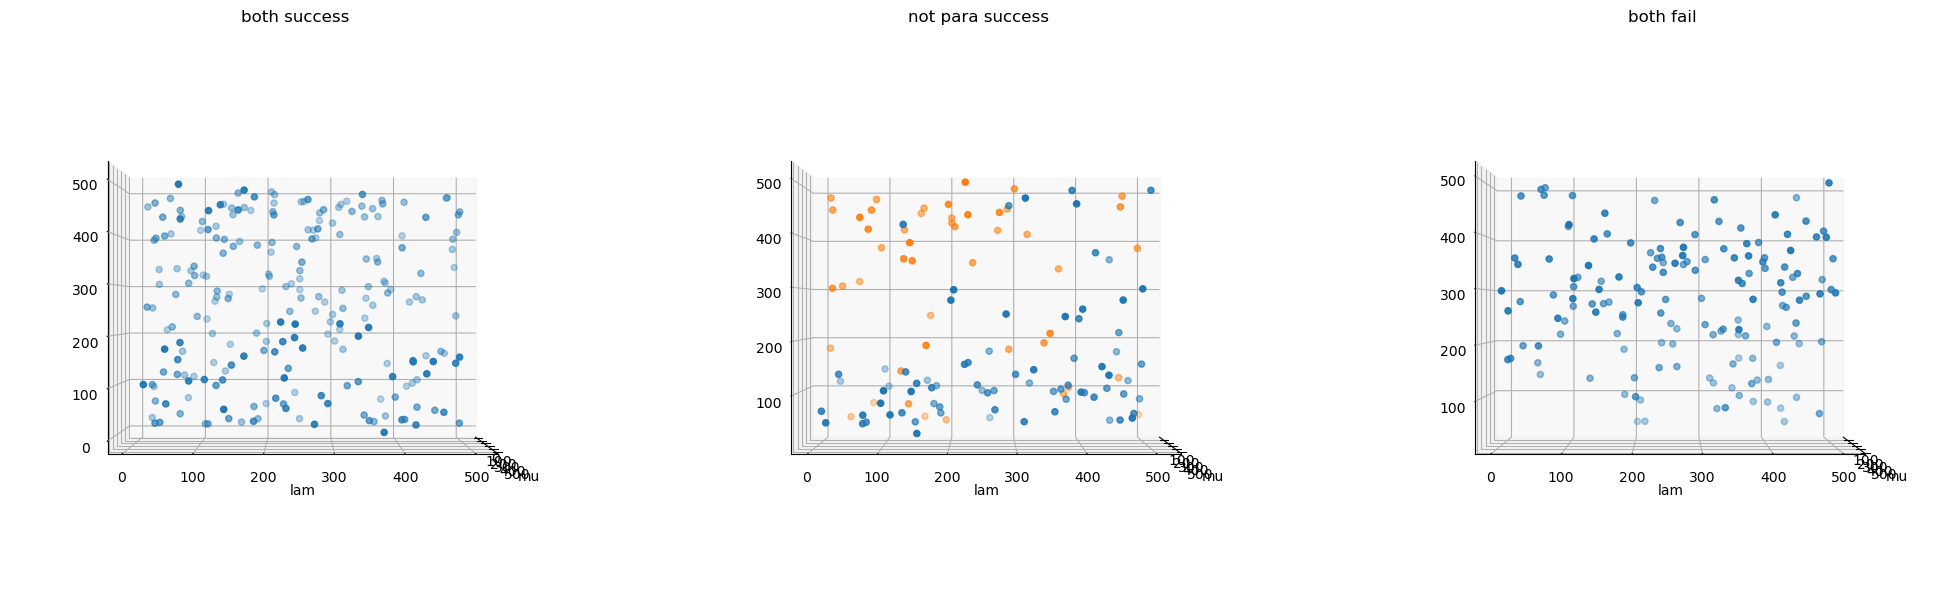

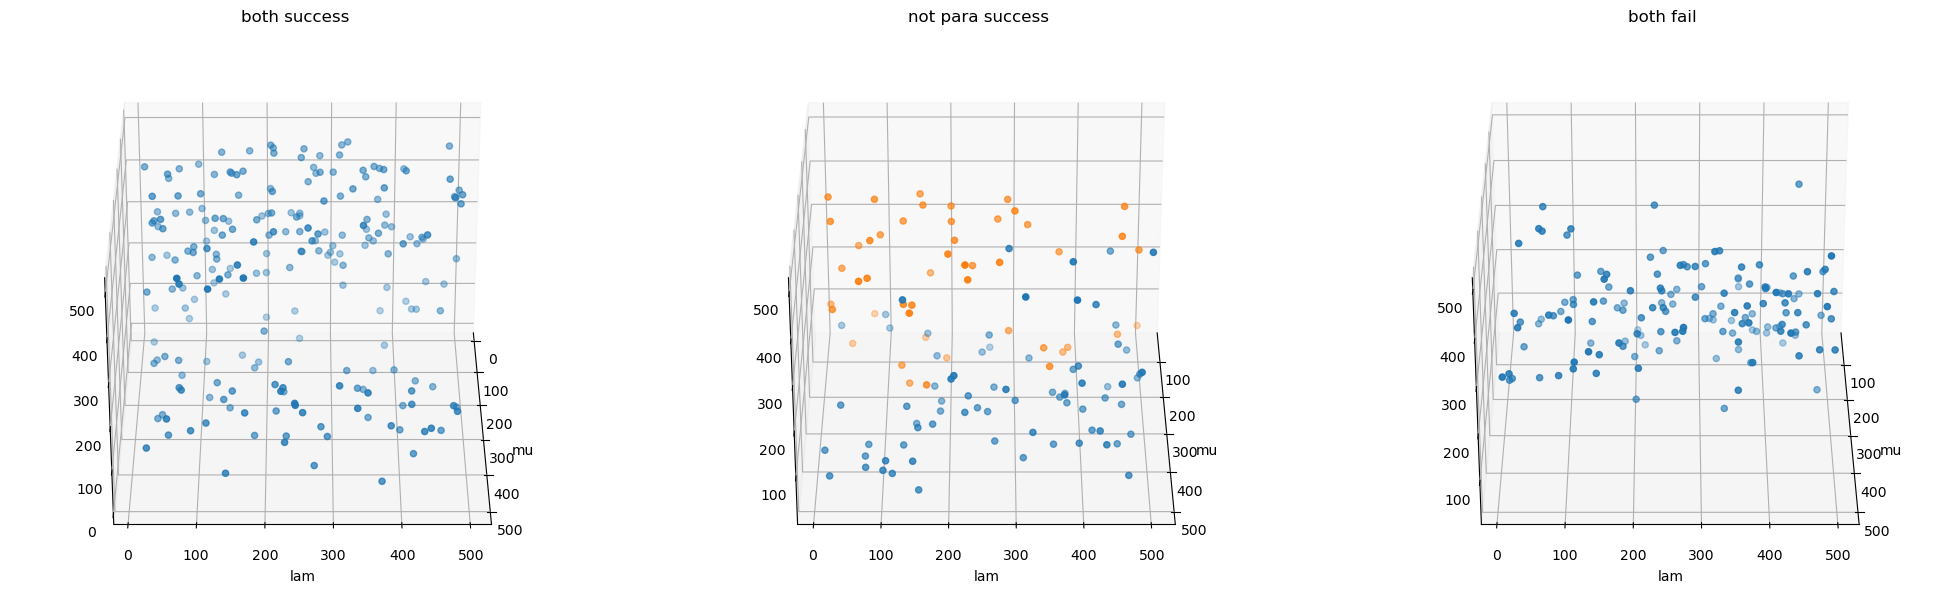

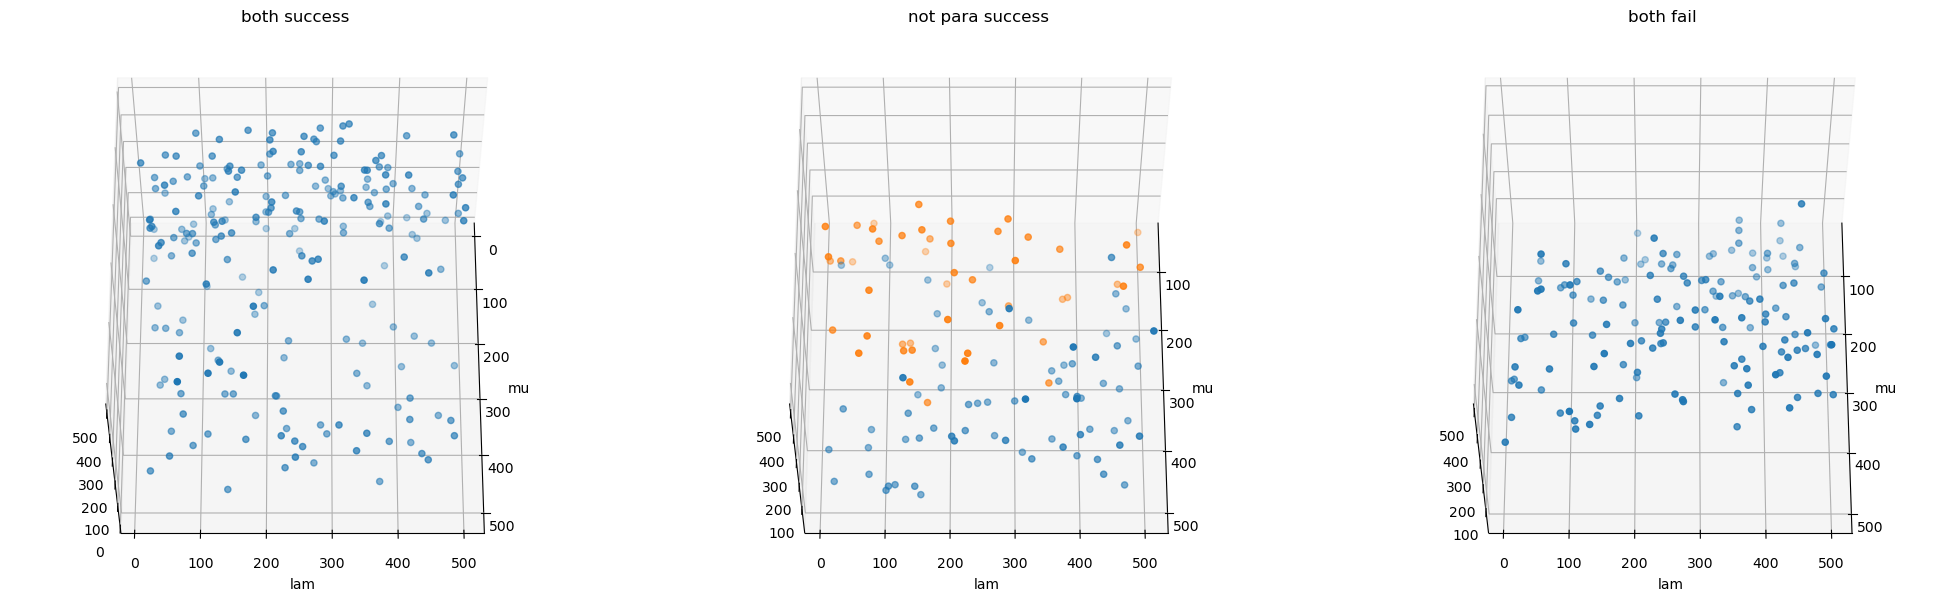

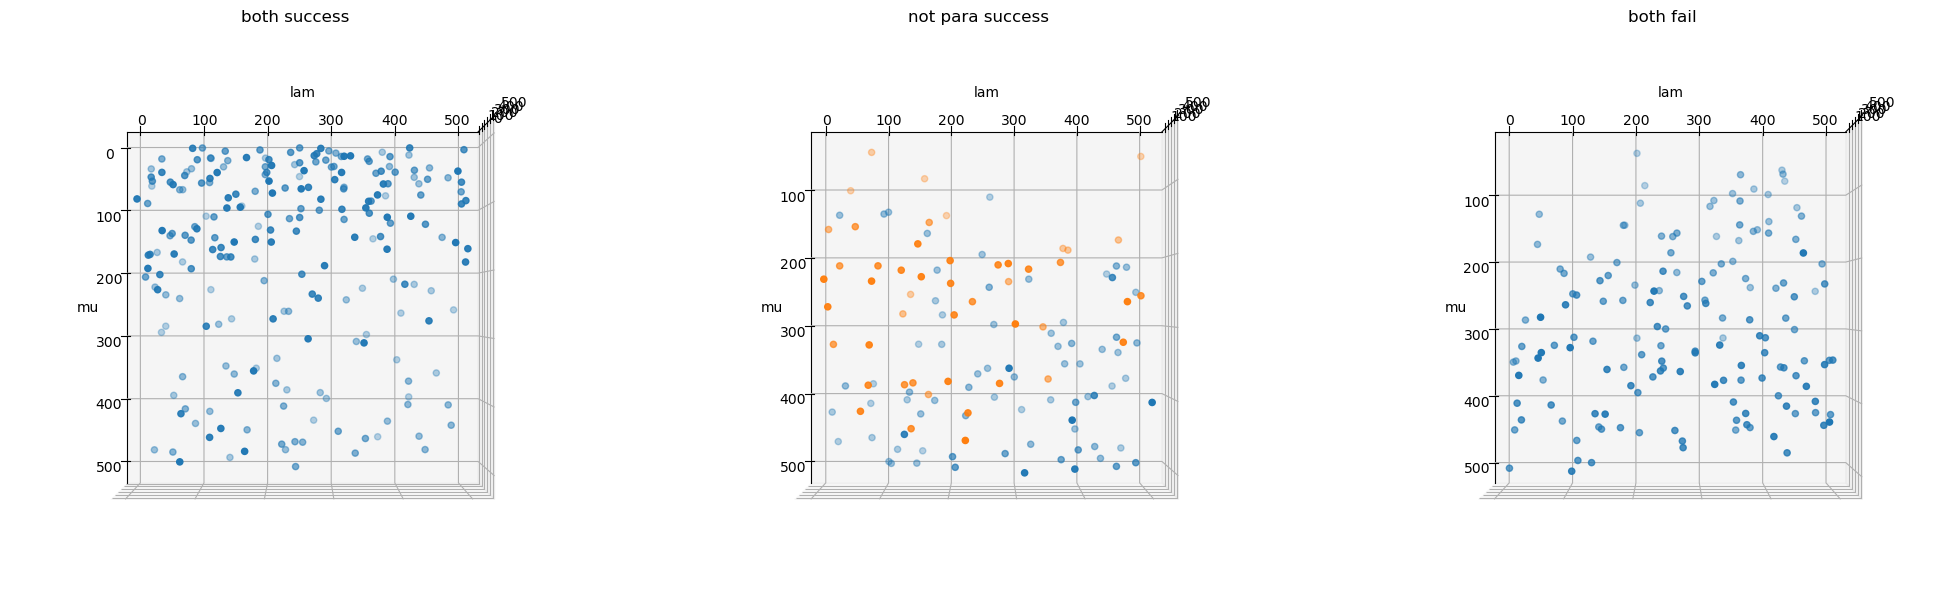

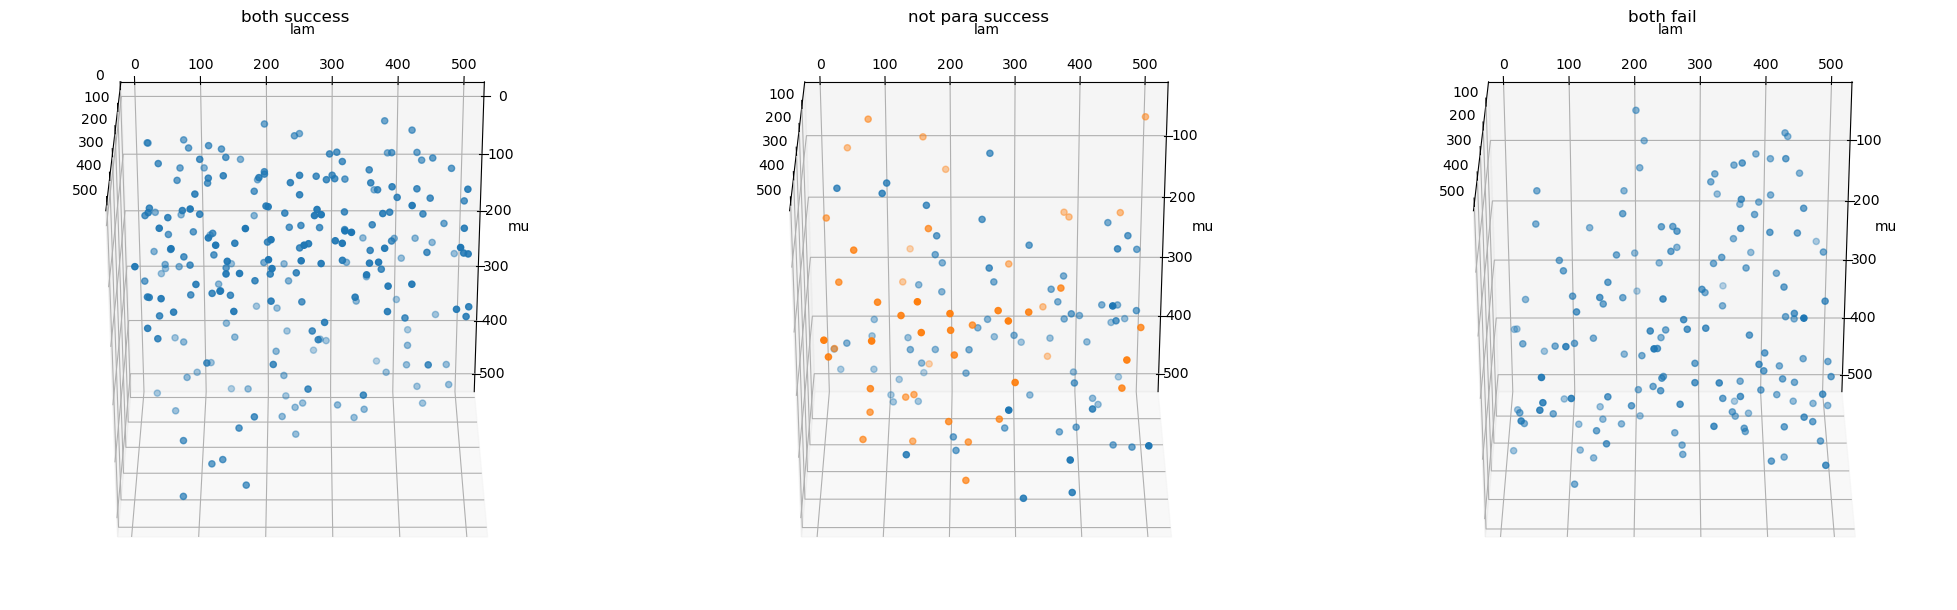

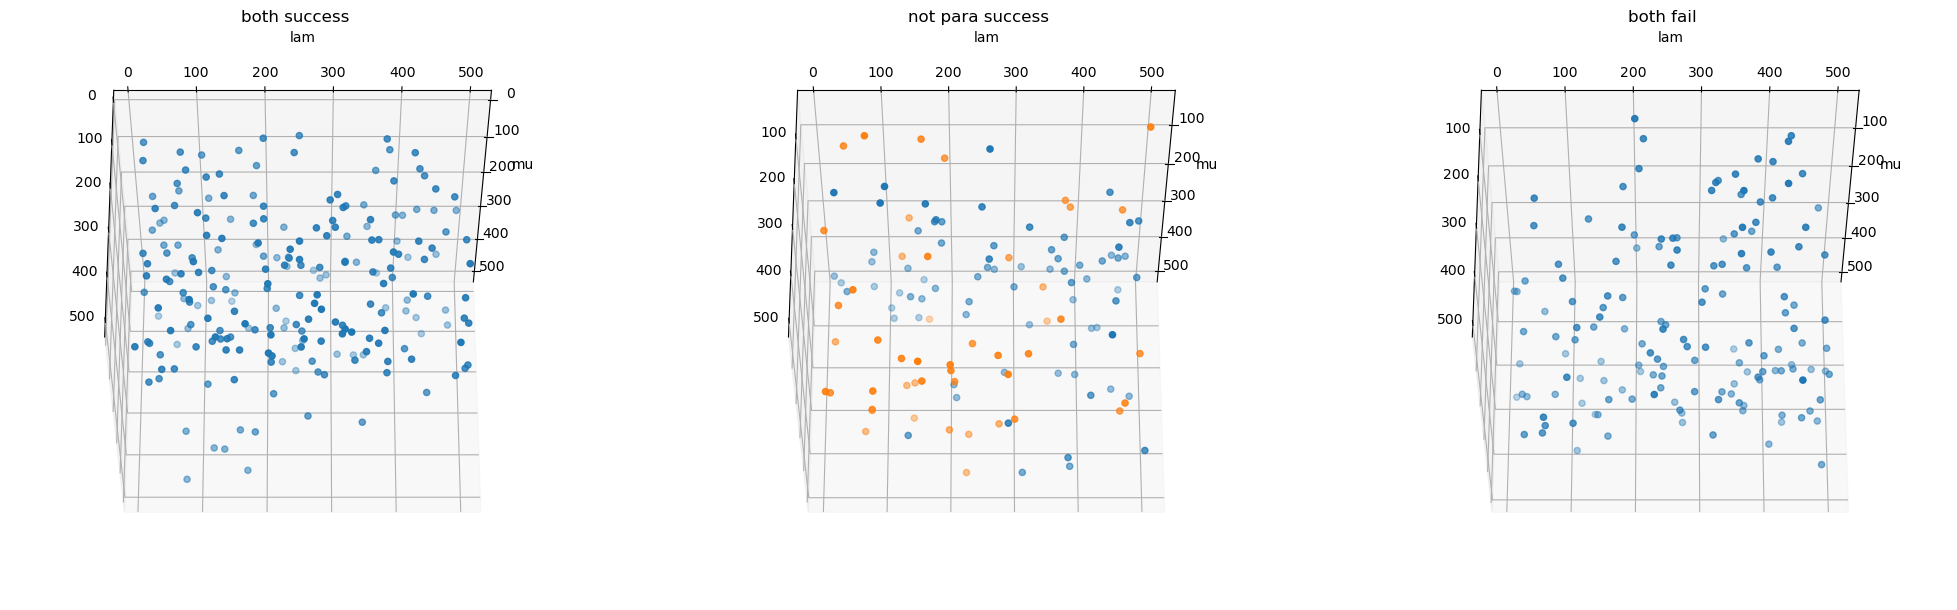

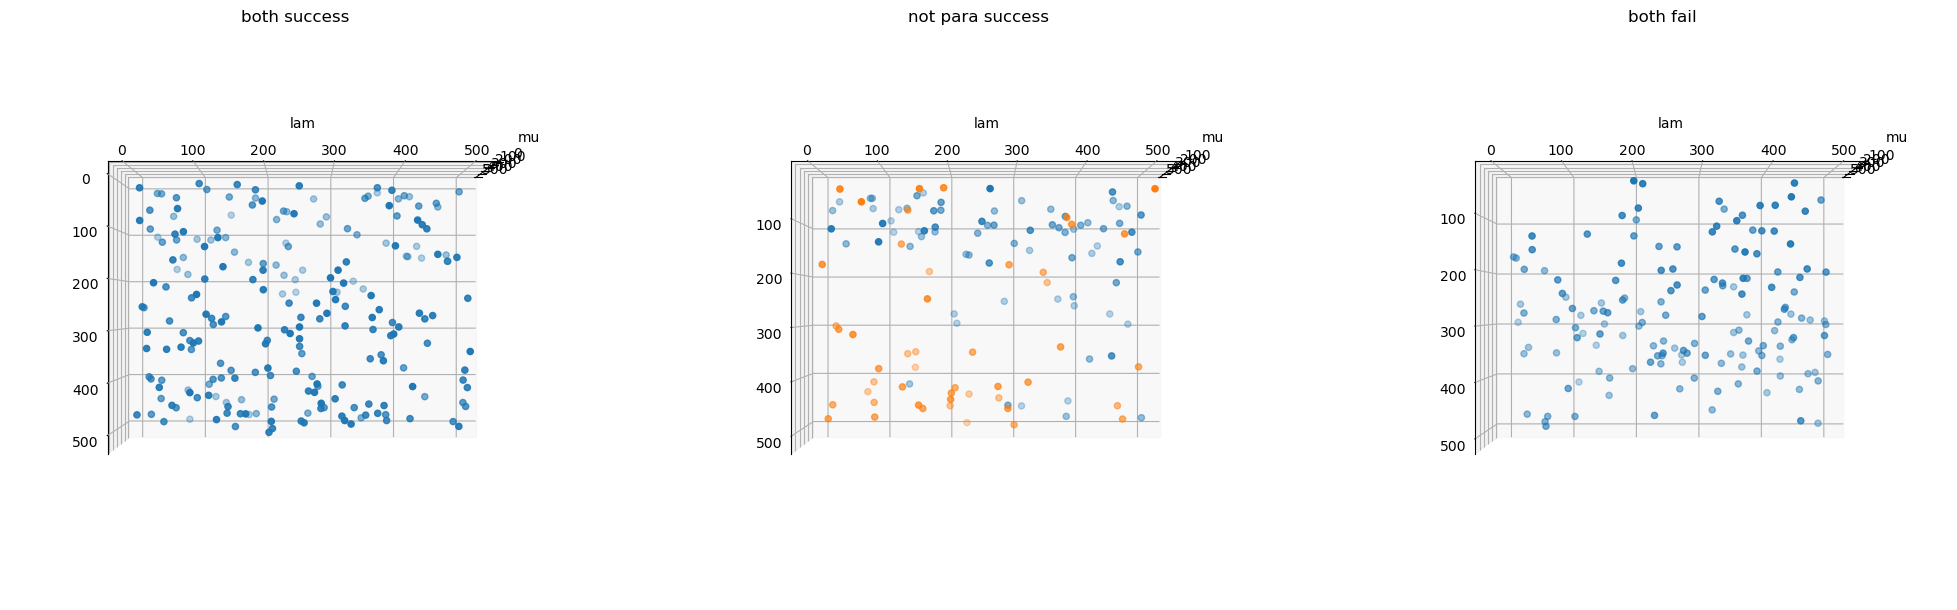

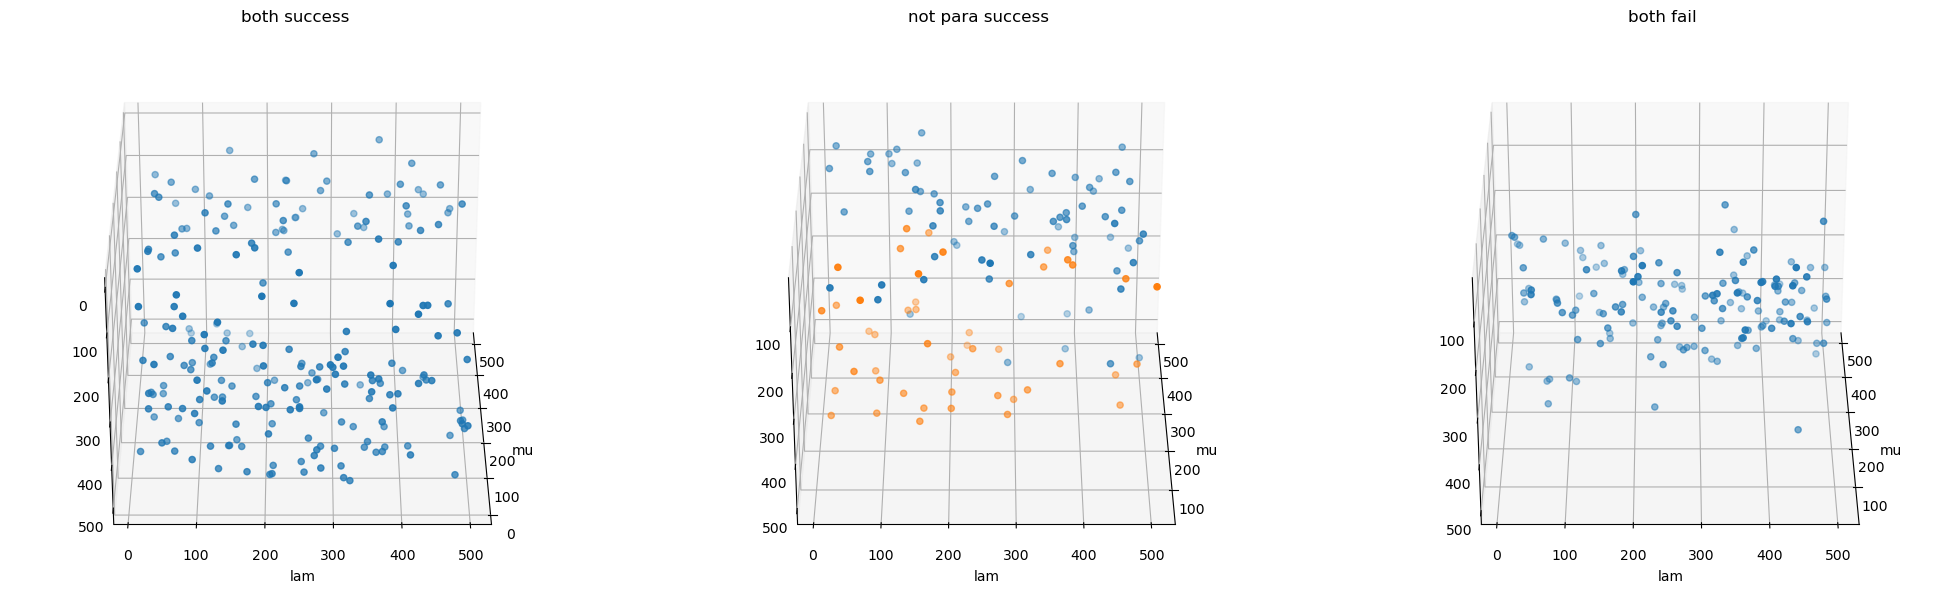

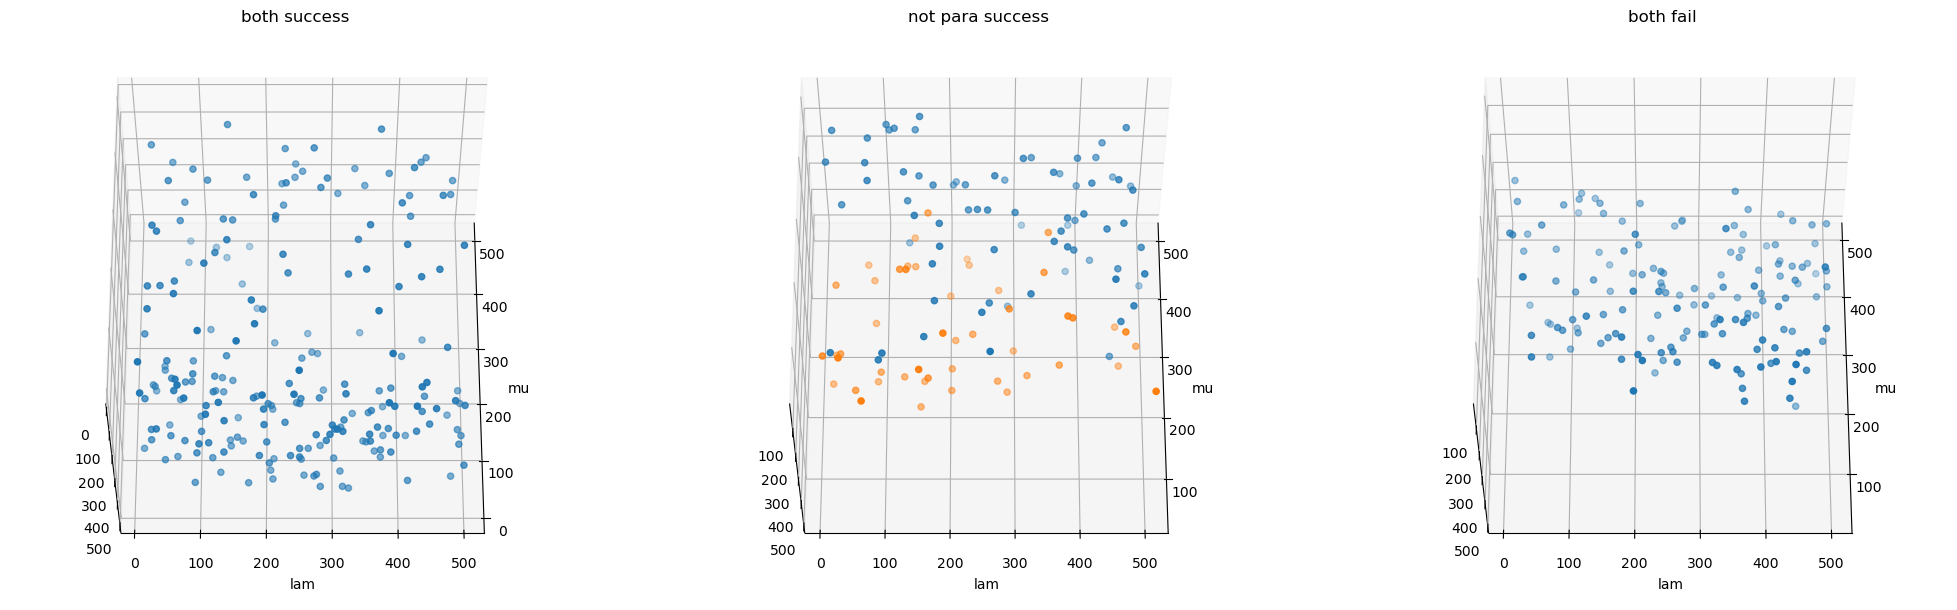

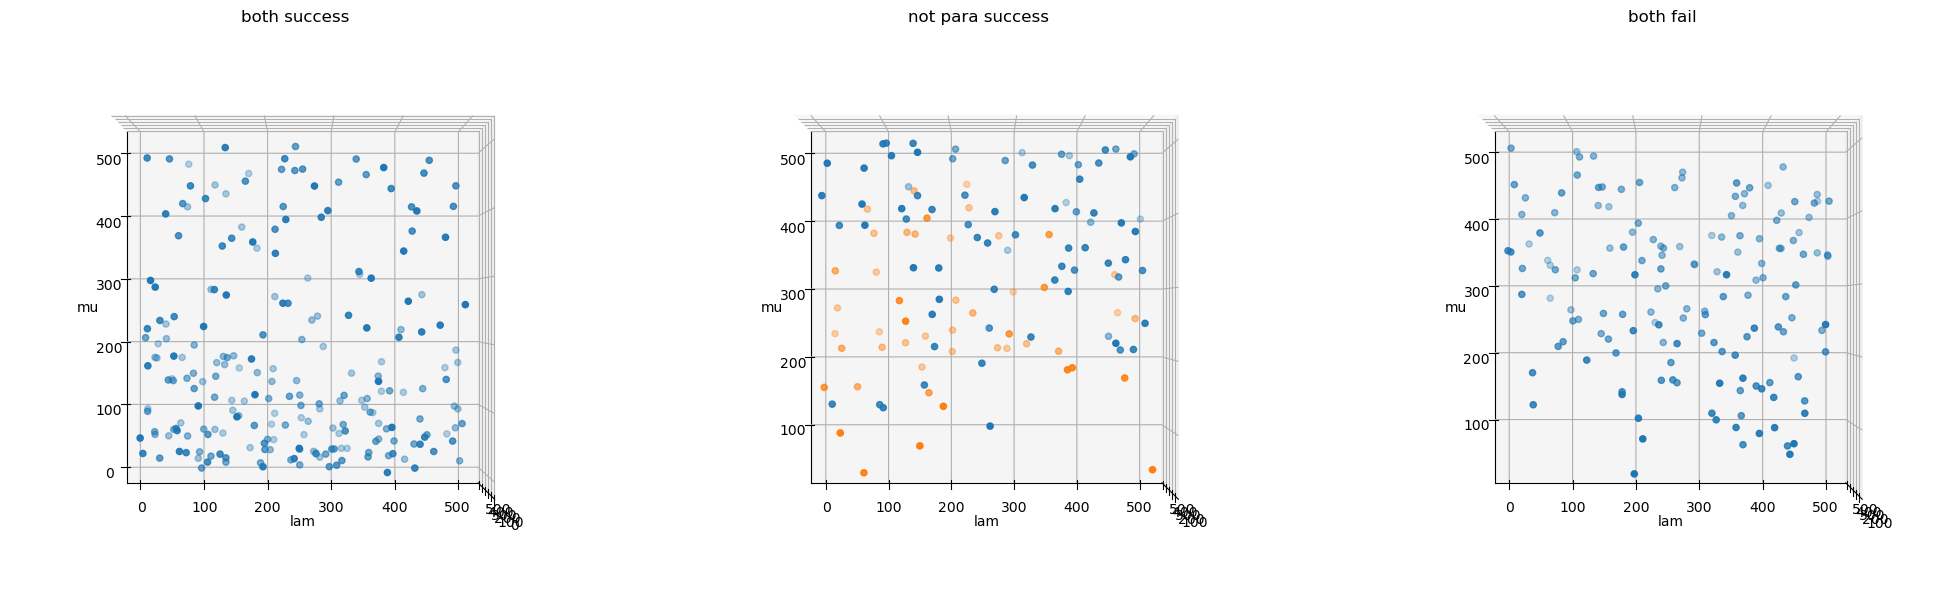

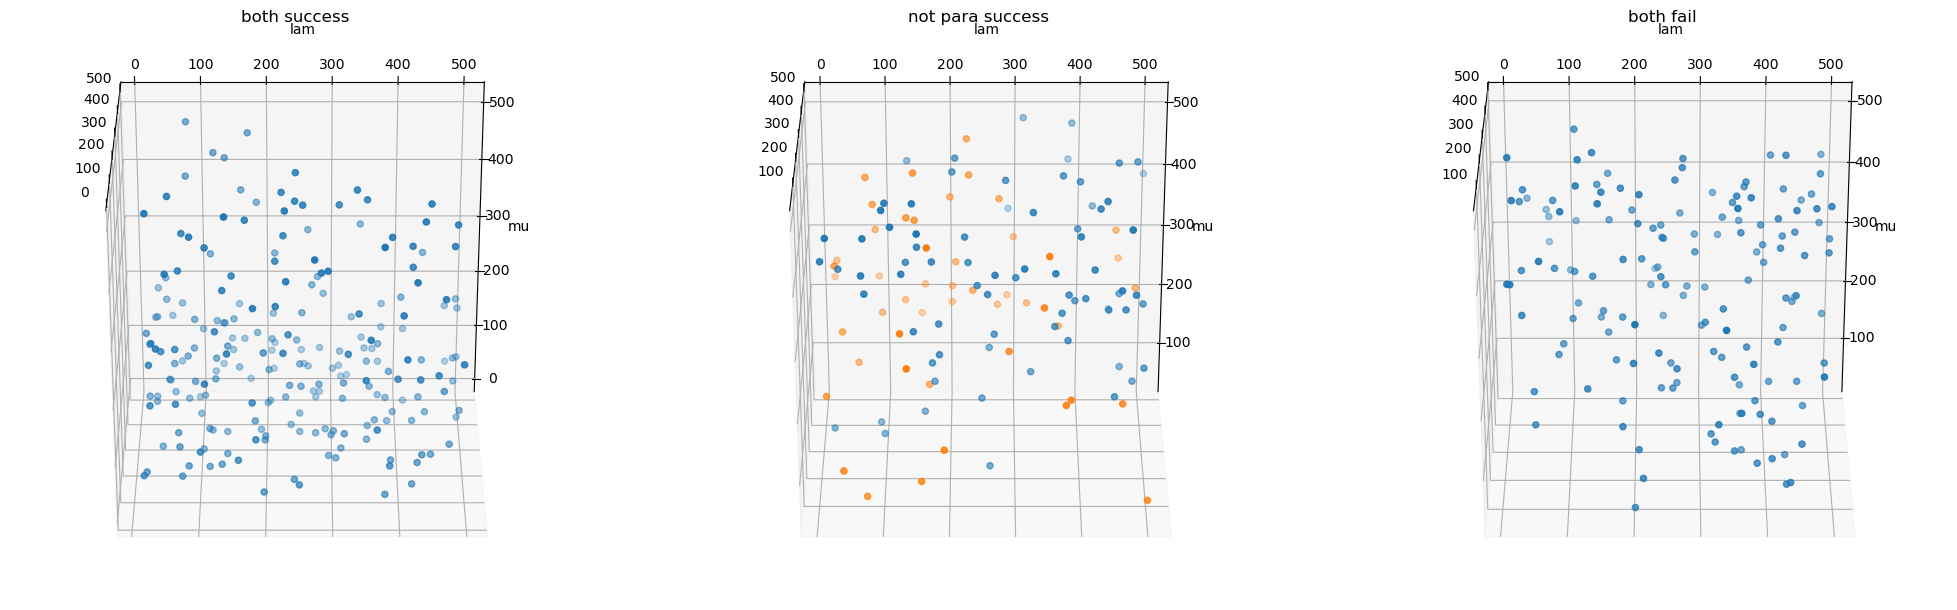

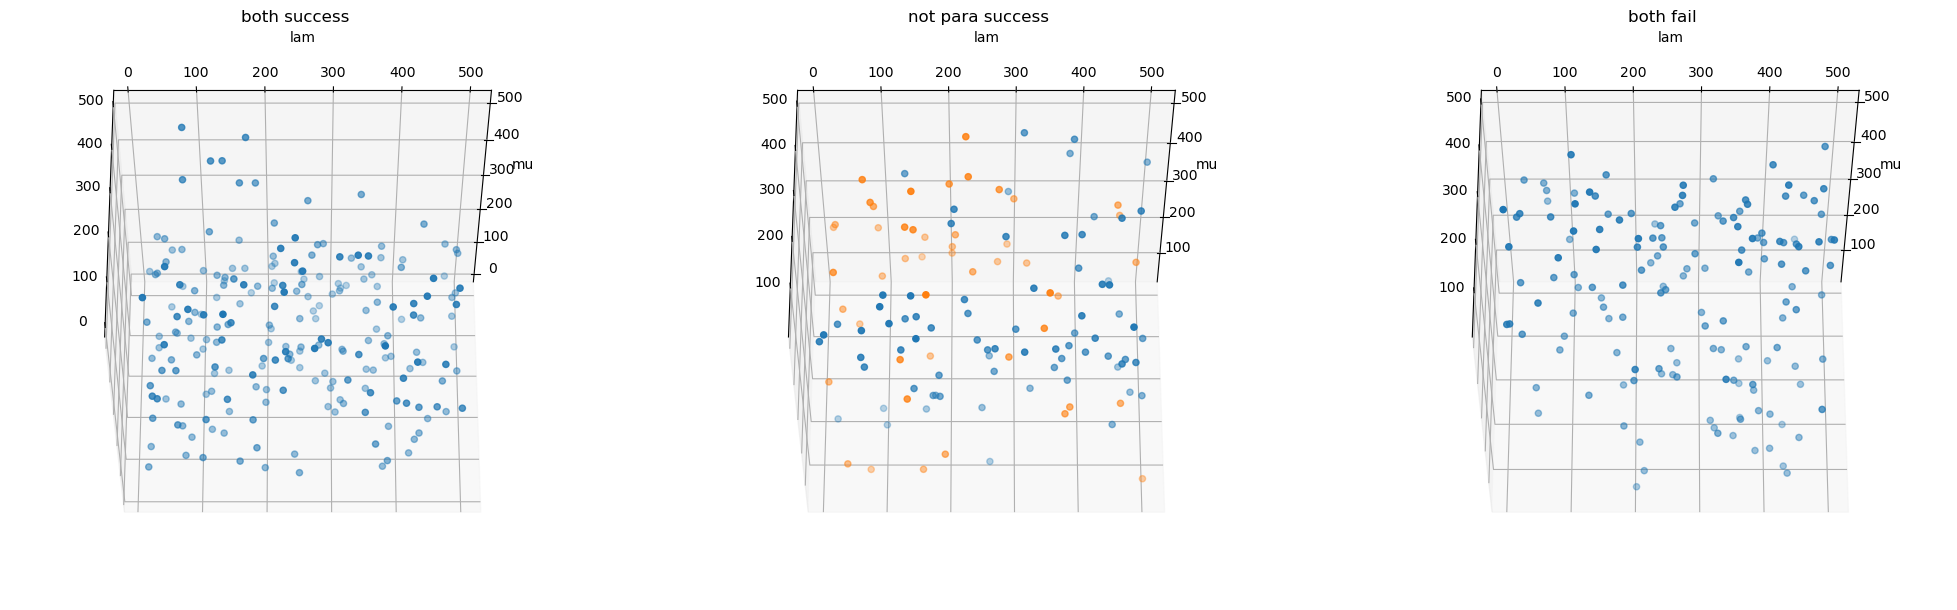

In [46]:
for i in range(0, 360, 30):
    fig = plt.figure(figsize=(25, 15))


    # test

    # same success
    same_success = (np.array(para_success_flag) * np.array(success_flag)).tolist()

    same_para_length_list = []
    same_no_para_length_list = []
    same_mu_list = []
    same_lam_list = []
    same_yield_stress_list = []
    for idx, value in enumerate(same_success):
        if value == 1:
            same_para_length_list.append(para_length_list[idx])
            same_no_para_length_list.append(length_list[idx])

            same_mu_list.append(mu_list[idx])
            same_lam_list.append(lam_list[idx])
            same_yield_stress_list.append(yield_stress_list[idx])

    print('same success count', sum(same_success))
    print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
    print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
    ax1.set_ylabel('lam')
    ax1.set_xlabel('mu')
    ax1.set_title('both success')
    ax1.view_init(i, 0)


    # only para success
    same_success = (np.array(para_success_flag) - np.array(success_flag)).tolist()

    same_para_length_list = []
    same_no_para_length_list = []
    same_mu_list = []
    same_lam_list = []
    same_yield_stress_list = []
    for idx, value in enumerate(same_success):
        if value == 1:
            same_para_length_list.append(para_length_list[idx])
            same_no_para_length_list.append(length_list[idx])

            same_mu_list.append(mu_list[idx])
            same_lam_list.append(lam_list[idx])
            same_yield_stress_list.append(yield_stress_list[idx])

    print('same success count', sum(same_success))
    print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
    print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
    ax2.set_ylabel('lam')
    ax2.set_xlabel('mu')
    ax2.set_title('para success')


    # only not para success
    same_success = (np.array(success_flag) - np.array(para_success_flag)).tolist()

    same_para_length_list = []
    same_no_para_length_list = []
    same_mu_list = []
    same_lam_list = []
    same_yield_stress_list = []
    for idx, value in enumerate(same_success):
        if value == 1:
            same_para_length_list.append(para_length_list[idx])
            same_no_para_length_list.append(length_list[idx])

            same_mu_list.append(mu_list[idx])
            same_lam_list.append(lam_list[idx])
            same_yield_stress_list.append(yield_stress_list[idx])

    print('same success count', sum(same_success))
    print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
    print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

    ax2.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
    ax2.set_ylabel('lam')
    ax2.set_xlabel('mu')
    ax2.set_title('not para success')
    ax2.view_init(i, 0)

    # both fail
    same_success = (np.array(success_flag) + np.array(para_success_flag)).tolist()

    same_para_length_list = []
    same_no_para_length_list = []
    same_mu_list = []
    same_lam_list = []
    same_yield_stress_list = []
    for idx, value in enumerate(same_success):
        if value == 0:
            same_para_length_list.append(para_length_list[idx])
            same_no_para_length_list.append(length_list[idx])

            same_mu_list.append(mu_list[idx])
            same_lam_list.append(lam_list[idx])
            same_yield_stress_list.append(yield_stress_list[idx])

    print('same success count', sum(same_success))
    print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
    print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
    ax3.set_ylabel('lam')
    ax3.set_xlabel('mu')
    ax3.set_title('both fail')
    ax3.view_init(i, 0)



    # # train
    # train_mu_list = []
    # train_lam_list = []
    # train_yield_stress_list = []

    # for path in train_files:
    #     with open(path, 'rb') as f: 
    #         data = pickle.load(f)           
    #     train_mu_list.append(data['mu'])
    #     train_lam_list.append(data['lam'])
    #     train_yield_stress_list.append(data['yield_stress'])

    # ax5 = fig.add_subplot(3, 2, 5, projection='3d')
    # ax5.scatter(train_mu_list, train_lam_list, same_yield_stress_list)
    # ax5.set_ylabel('lam')
    # ax5.set_xlabel('mu')

    # ax5.set_title('train')

In [47]:
aaa = ['11', '22', '33']

In [49]:
[]

AttributeError: 'list' object has no attribute 'map'